In [334]:
# put all RGB values into a 2D array 
# loop through array?
# use array to create map of greenness, snow, or whatever Paul wants
# use im.getdata?

In [335]:
%matplotlib inline
import pandas as pd
import xarray as xr
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
from PIL import Image
import requests
from io import BytesIO

In [336]:
# shows IR photo

ir_test_photo = 'https://phenocam.sr.unh.edu/data/archive/bozeman/2017/06/bozeman_IR_2017_06_05_184805.jpg'
response = requests.get(ir_test_photo)
IR_img = Image.open(BytesIO(response.content))
#IR_img

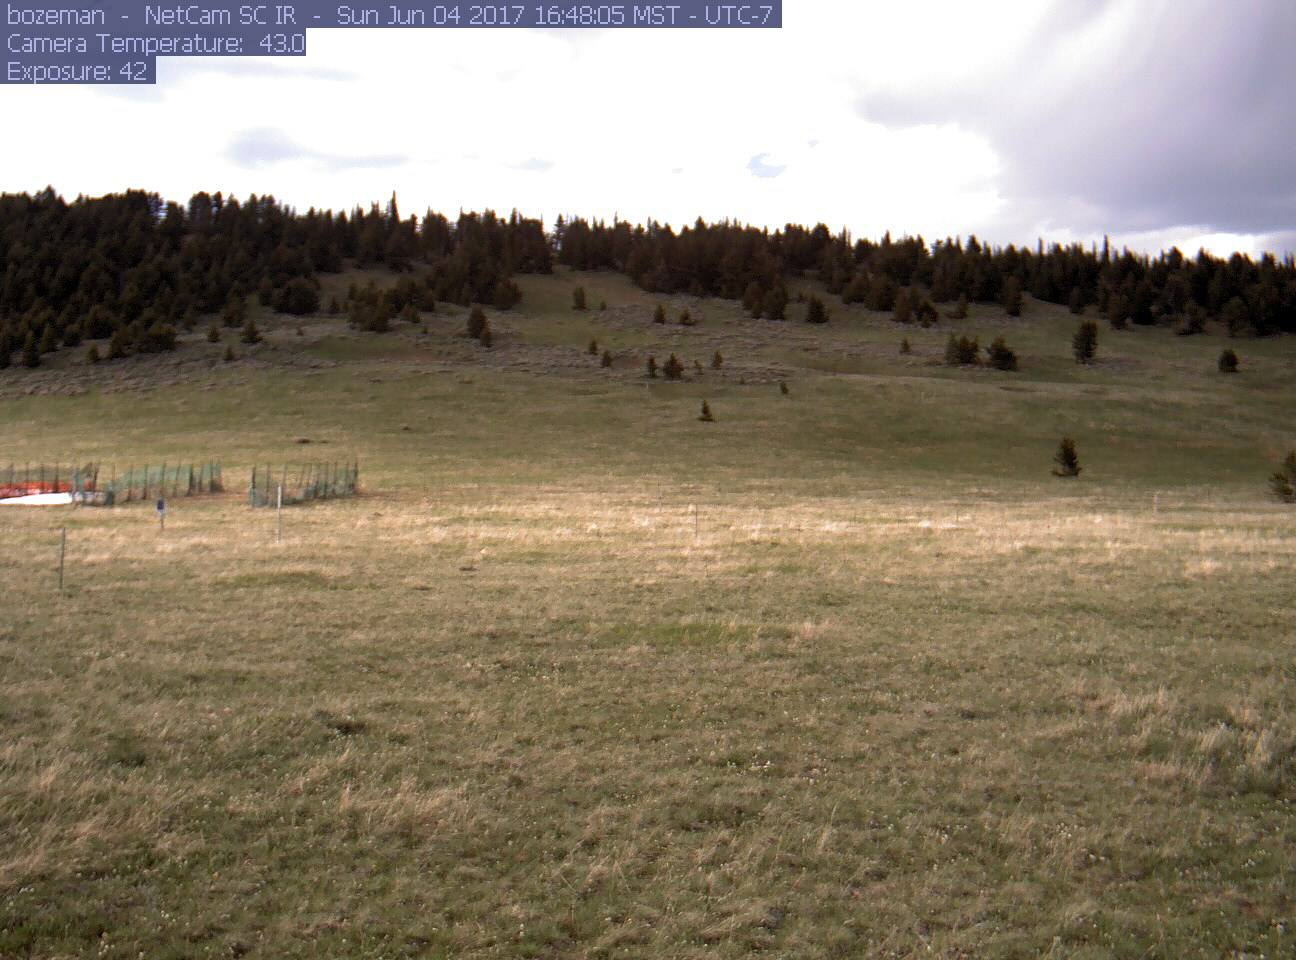

In [345]:
# shows visual photo

vis_test_photo = 'https://phenocam.sr.unh.edu/data/archive/bozeman/2017/06/bozeman_2017_06_04_164805.jpg'
response = requests.get(vis_test_photo)
VIS_img = Image.open(BytesIO(response.content))
VIS_img

In [338]:
# crops photo
width = IR_img.size[0]
height = IR_img.size[1]
chop_IR_img = IR_img.crop(
    (
        width - 1296,
        height - 425,
        width,
        height
    )
)
#chop_IR_img

In [339]:
# crops photo
width = VIS_img.size[0]
height = VIS_img.size[1]
chop_vis_img = VIS_img.crop(
    (
        width - 1296,
        height - 425,
        width,
        height
    )
)
#chop_vis_img

In [340]:
# finds all pixel values for IR image
width, height = chop_IR_img.size
IR_pixel_values = list(chop_IR_img.getdata())
IR_pixel_values = numpy.array(IR_pixel_values).reshape((width, height, 3))

In [341]:
# finds all pixel values for visual image
width, height = chop_vis_img.size
vis_pixel_values = list(chop_vis_img.getdata())
vis_pixel_values = numpy.array(vis_pixel_values).reshape((width, height, 3))

In [351]:
# averages all IR pixel data (returns a single number)
x = (np.average(IR_pixel_values, axis=0))
y = np.average(x, axis=0)
IR_ave = np.average(y, axis=0)

In [352]:
# averages all visual pixel data (returns red average)
x = (np.average(vis_pixel_values, axis=0))
y = np.average(x, axis=0)
red_ave = y.item(0)

In [353]:
# calculates NDVI?
(IR_ave - red_ave)/(IR_ave + red_ave)

-0.10684528175703682

In [ ]:
# import all photos
# takes RGB values from each photo (this should be a loop)
# figure out how to put all values in an array